X = x1,x2,x3 ....... xn #notice X is capital as it contain many x (features)
y = your target         #notice y is small as its one feature or one column
f() = your model

how to build model
1- define : X,y and the algorithm like decision tree >>> model=modelfunc()
2- fit : training >>> model.fit(X,y)
3- predict : y=f(X) >>> y= model.predict(X)
4-evaluate : calc accuracy of model 

In [1]:
import pandas as pd

In [2]:
#data= pd.read_csv("C:/Users/abanop/Documents/GitHub/ds/datasets/IRIS.csv")
#note if you want to use this data set on kaggle or google colab you can use >>> ! wget 'raw path from gethub'
data_iris = pd.read_csv("../../datasets/IRIS.csv")

In [3]:
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


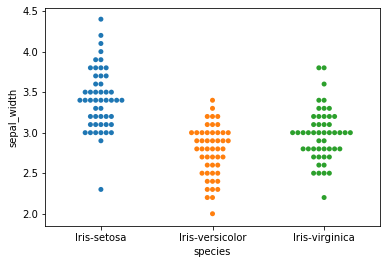

In [5]:
import seaborn as sns
sns.swarmplot(x=data_iris["species"],y=data_iris["sepal_width"])

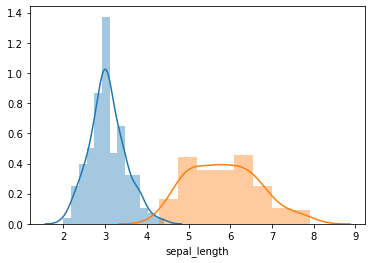

In [28]:
sns.distplot(a=data_iris["sepal_width"])
sns.distplot(a=data_iris["sepal_length"])

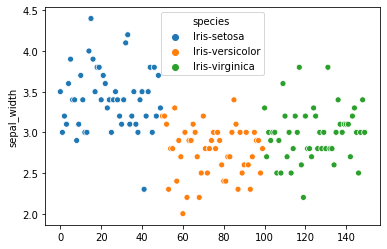

In [6]:
sns.scatterplot(x=data_iris.index,y=data_iris["sepal_width"],hue=data_iris["species"])

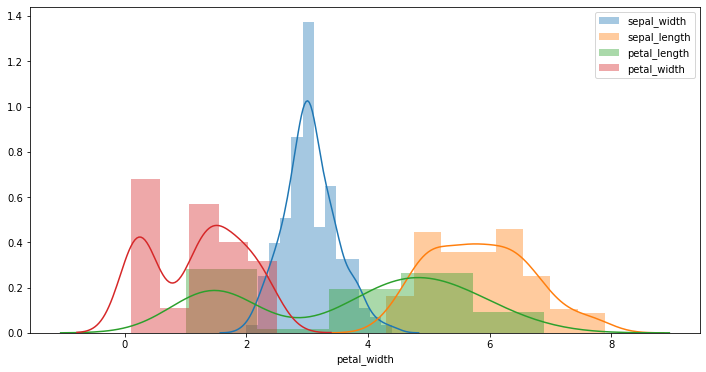

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12,6])
sns.distplot(a=data_iris["sepal_width"],label="sepal_width")
sns.distplot(a=data_iris["sepal_length"],label="sepal_length")
sns.distplot(a=data_iris["petal_length"],label="petal_length")
sns.distplot(a=data_iris["petal_width"],label="petal_width")
plt.legend()

In [11]:
iris_feature=["sepal_length","sepal_width","petal_length","petal_width"]
#X=data_iris[iris_feature]
X=data_iris.drop("species",axis=1)
y=data_iris["species"]

In [12]:
X.tail(2)

,sepal_length,sepal_width,petal_length,petal_width
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [13]:
y.tail(2)

148    Iris-virginica
149    Iris-virginica
Name: species, dtype: object

In [14]:
#algorithm
from sklearn.tree import DecisionTreeClassifier

In [15]:
DT_model=DecisionTreeClassifier(random_state=1)

In [16]:
#train
DT_model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [17]:
predictions= DT_model.predict(X)
print(predictions)


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [18]:
new_item = {"sepal_length":[5.0],"sepal_width":[1.2],"petal_length":[3.5],"petal_width":[1]}
newDF= pd.DataFrame(new_item)
newDF

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,1.2,3.5,1


In [19]:
new_item=[5.0,1.2,3.5,1]
new_df=pd.DataFrame(data=[new_item],columns=iris_feature)
new_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,1.2,3.5,1


In [20]:
predictions_newDF = DT_model.predict(newDF)

In [21]:
predictions_newDF

array(['Iris-versicolor'], dtype=object)

In [22]:
items=[1,2,3,4]
new_item=pd.DataFrame([items],columns=iris_feature)
new_item
predictions_newDF = DT_model.predict(new_item)
predictions_newDF

array(['Iris-versicolor'], dtype=object)

# model validation = error 

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y,predictions)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

# train_test_split

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.20)

In [26]:
model=DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# try naive_bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
def model_report(x_train,y_train,x_test,y_test,model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(classification_report(y_test,pred))
model_report(x_train,y_train,x_test,y_test,model)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



# try SVM

In [43]:
from sklearn.svm import SVC
model=SVC(random_state=0)
model_report(x_train,y_train,x_test,y_test,model)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# try ensemble >.. random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model_report(x_train,y_train,x_test,y_test,model)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

